In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold


In [3]:
data = pd.read_csv(r'/content/df_features_din.csv')
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

sc = StandardScaler()
x = sc.fit_transform(x)
#y = sc.fit_transform(y)

#implementation of the genetic algorithm

from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(x, y)
#print(tpot.score(x_test, y_test))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.2159920780862909

Generation 2 - Current best internal CV score: -0.2159920780862909

Generation 3 - Current best internal CV score: -0.21528807627004481

Generation 4 - Current best internal CV score: -0.2142109882499243

Generation 5 - Current best internal CV score: -0.2142109882499243

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.35000000000000003, min_samples_leaf=13, min_samples_split=16, n_estimators=100)


TPOTRegressor(generations=5, population_size=50, verbosity=2)

In [10]:
v_Threshold = VarianceThreshold(threshold=0)
v_Threshold.fit(x)

VarianceThreshold(threshold=0)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [2]:
#To implement the genetic algorithm, i will be using "TPOTRegressor"

! pip install tqdm update_checker tqdm
! pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 5.2 MB/s 
     |████████████████████████████████| 139 kB 52.0 MB/s 
     |████████████████████████████████| 255.9 MB 47 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=6c70c300d40cbf1fa260a2e5af45d09429302773ed8c24c9e23cbaa0955b3e90
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
#implementation of the genetic algorithm

from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=10, population_size=10, verbosity=10)
tpot.fit(x_train, y_train)
#print(tpot.score(x_test, y_test))

30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/110 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 manhattan was provided as affinity. Ward can only work with euclidean distances..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
Skipped pipeline #65 due to time out. Continuing to the next pipeline.
Skipped pipeline #82 due to time out. Continuing to the next pipeline.


TPOTRegressor(generations=10, population_size=10, verbosity=10)

In [12]:
#SVM MODEL

model_svm = SVC(random_state=1)
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      2172
           1       0.89      0.78      0.83      3050

    accuracy                           0.81      5222
   macro avg       0.81      0.82      0.81      5222
weighted avg       0.82      0.81      0.81      5222



0.8121409421677518

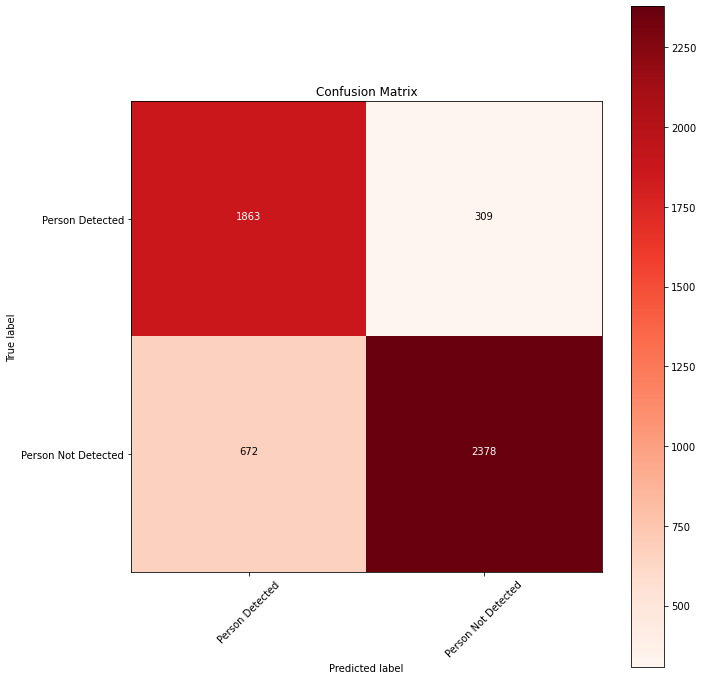

In [13]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_svm)
target_names = ["Person Detected", "Person Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_svm)


roc_auc_score for SVM:  0.8187034688886876


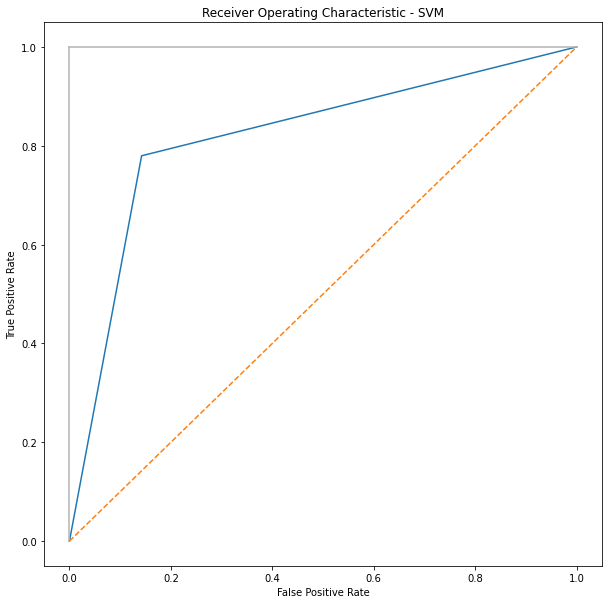

In [14]:
# plot for SVM
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_svm)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_pred_svm))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
#RandomForestClassifier(ensemble) model

model_RFC = RandomForestClassifier(random_state = 1)
model_RFC.fit(x_train, y_train)
y_pred_RFC = model_RFC.predict(x_test)
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      2172
           1       0.92      0.81      0.86      3050

    accuracy                           0.85      5222
   macro avg       0.85      0.86      0.85      5222
weighted avg       0.86      0.85      0.85      5222



0.8502489467636921

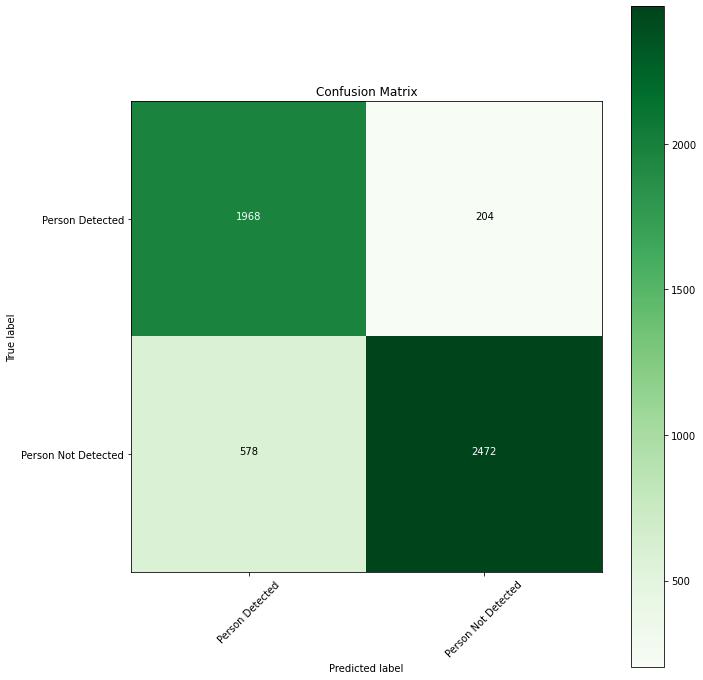

In [16]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_RFC)
target_names = ["Person Detected", "Person Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_RFC)


roc_auc_score for RFC:  0.8582845756724934


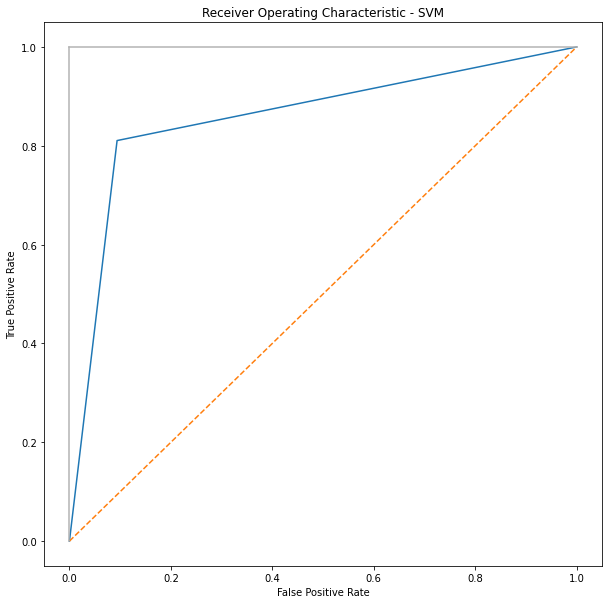

In [17]:
# plot for RFC
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_RFC)
print('roc_auc_score for RFC: ', roc_auc_score(y_test, y_pred_RFC))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
#KNN model

model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train, y_train)
y_pred_KNN = model_KNN.predict(x_test)
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      2172
           1       0.88      0.78      0.83      3050

    accuracy                           0.81      5222
   macro avg       0.81      0.82      0.81      5222
weighted avg       0.82      0.81      0.81      5222



0.8104174645729606

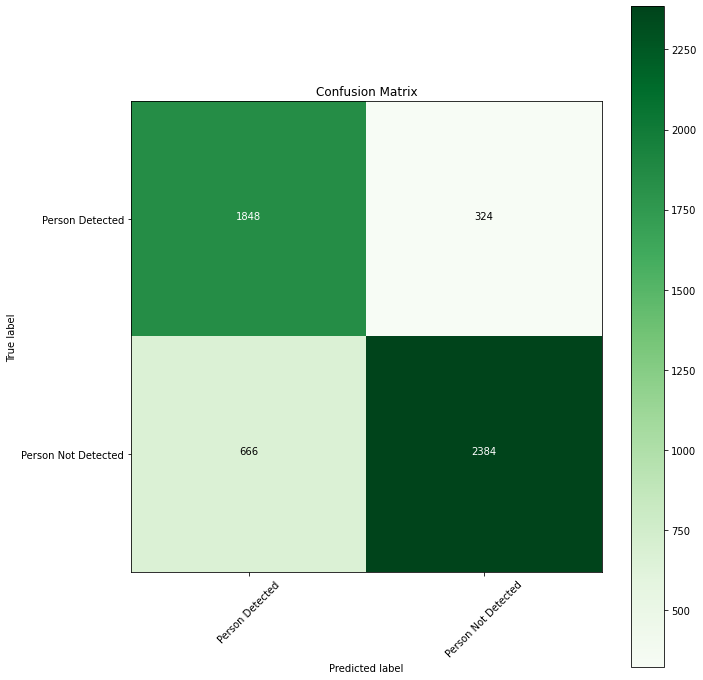

In [19]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_KNN)
target_names = ["Person Detected", "Person Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_KNN)


roc_auc_score for KNN:  0.8162340367720315


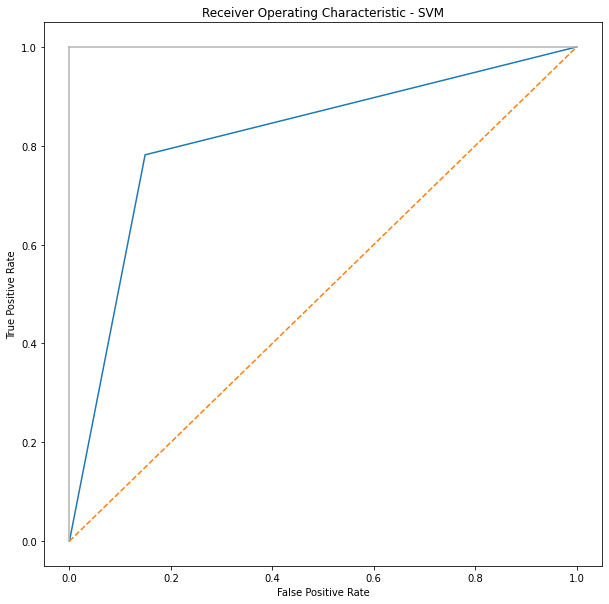

In [20]:
# plot for KNN
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_KNN)
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_pred_KNN))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()